<a href="https://colab.research.google.com/github/NabilBADRI/Multidialect-Project/blob/main/NLP_fasttext_Aravec_BiGRU_Embedding_EGYPTIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EGYPTIAN Dataset

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train=pd.read_excel('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/D5.xlsx')
# test=pd.read_excel('/content/drive/MyDrive/kaggle-nabil-badri/Text Classification Notebooks/BI-GRU/MyArticle-dataset-arabe/dataset1and2.xlsx')
label=pd.read_excel('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/D5.xlsx',header=None).iloc[:,-1]
#OFF=0 
#NOT=1

In [ ]:
train['word_count'] = train['commentaire'].apply(lambda x : len(x.split()))
train

,commentaire,classe,word_count
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,normal,16
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,hate,10
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,normal,9
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,hate,8
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,hate,16
...,...,...,...
1095,أستاذنا العزيز بلال فضل يحزنني أن يتم حذف حلقا...,normal,23
1096,،برنامج يدعو للتفكير أكيد يمنعوه لأنهم خوافون ...,normal,10
1097,"""#أزهى_عصور_المسخره هل ضيعت ""شيما"" محافظ بورس...",hate,6
1098,الله يلعنك و يلعن اللى جابوك يا رمه جايفه,abusive,9


In [ ]:
# #Encoding
# df.label.replace({'normal':0,'abusive':1,'spam':2,'hateful':3},inplace=True)
# df.head()

In [ ]:
train[train['word_count'] == 30]

,commentaire,classe,word_count
71,كلك ذوق باسم يوسف .. و متل ما كلن في صبايا هيك...,normal,30


In [ ]:
train['commentaire'][3]

'قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان'

In [ ]:
y_train=train['classe']
X_train=train['commentaire']
#test=test['comm']
y_train=pd.factorize(y_train)[0]
# y_test=pd.factorize(y_test)[0]
train['labels'] = pd.factorize(y_train)[0]

import collections
collections.Counter(y_train)

#Counter({0: 4400, 1: 8840})

Counter({0: 453, 1: 444, 2: 203})

In [ ]:
train

,commentaire,classe,word_count,labels
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,normal,16,0
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,hate,10,1
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,normal,9,0
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,hate,8,1
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,hate,16,1
...,...,...,...,...
1095,أستاذنا العزيز بلال فضل يحزنني أن يتم حذف حلقا...,normal,23,0
1096,،برنامج يدعو للتفكير أكيد يمنعوه لأنهم خوافون ...,normal,10,0
1097,"""#أزهى_عصور_المسخره هل ضيعت ""شيما"" محافظ بورس...",hate,6,1
1098,الله يلعنك و يلعن اللى جابوك يا رمه جايفه,abusive,9,2


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#cleaning data
import re
from nltk.stem.porter import PorterStemmer
tokenizer=nltk.tokenize.WhitespaceTokenizer()
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")
def preprocess(review):
   review = re.sub('[^ا-ي]', ' ', review)
 
   review = tokenizer.tokenize(review)
   review = [ar_stemmer.stemWord(word) for word in review if not word in set(stopwords_list )]
   review = ' '.join(review)
   return review

In [ ]:
# X_train = train['commentaire'].apply(preprocess)
X_train = X_train.apply(preprocess)


In [ ]:
X_train[0] ### Après preprocessing

'مبر سامح لعجز تام عقبال الل جوه الل بره عاجز يزايد عاجز'

In [ ]:
train['commentaire'][0] ### Originale

'مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. اللي بره يا عاجز يا بيزايد على العاجز'

In [ ]:
# x=train[323].lower().replace('@user','').replace('url','')
# x=re.sub('[^A-Za-z]', ' ', x)
# re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x)

In [ ]:
# # Creating the training corpus
# stop_words = set(stopwords.words("english")) 
# lemmatizer = WordNetLemmatizer()
# corpus_train = []
# for i in train:
#     x=i.lower()
#     x=x.replace('@user','')
#     x=x.replace('@[\w\-]+','')
#     #x=x.translate(str.maketrans('', '', string.punctuation))
#     x = re.sub('[^A-Za-z]', ' ', x)
#     #x=re.sub('\s+',' ',x)
#     x=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x) #url
#     #x = [lemmatizer.lemmatize(token) for token in x.split(" ")]
#     #x = [word for word in x if not word in stop_words]
#     #x=" ".join(x)
#     corpus_train.append(x)    
# # Creating the training corpus
# corpus_test = []
# for i in test:
#     x=i.lower()
#     x=x.replace('@user','')
#     x=x.replace('@[\w\-]+','')
#     #x=x.translate(str.maketrans('', '', string.punctuation))
#     x = re.sub('[^A-Za-z]', ' ', x)
#     #x=re.sub('\s+',' ',x)
#     x=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x) #url
#     #x = [lemmatizer.lemmatize(token) for token in x.split(" ")]
#     #x = [word for word in x if not word in stop_words]
#     #x=" ".join(x)
#     corpus_test.append(x) 

In [ ]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import sequence
# max_words = 5000 #frequency of words to be kept
# max_len = 200
# tokenize = Tokenizer(num_words=max_words)
# tokenize.fit_on_texts(corpus_train)
# sequences = tokenize.texts_to_sequences(corpus_train)
# word_index = tokenize.word_index
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
# splitting the data into target and feature
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train ,test_size = 0.1, random_state=0)
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1 
vocab_size # Adding 1 because of reserved 0 index

4510

In [ ]:
word_index = tokenizer.word_index


In [ ]:
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)
print('Max len:', maxlen)

Max len: 28


In [ ]:
# len(x.split())

# lens_train = [len(i.split()) for i in list(train['commentaire'])]
# lens_test = [len(i.split()) for i in X_test]
# lens = lens_train + lens_test

# maxlen_ = np.max(train['word_count'])
# print('Max len:', maxlen_)


In [ ]:
# num_words = min(max_words, len(word_index)) + 1
# print(num_words)

In [ ]:
### AraVec embeddings
#!wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_cbow_300_twitter.zip

In [ ]:
### FastText Arabic embeddings
##!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz

In [ ]:
### Unzip AraVec 
#!unzip /content/full_grams_cbow_300_twitter.zip

In [ ]:
### Unzip FastText Arabic
#!gzip -d /content/cc.ar.300.vec.gz

In [ ]:
embedding_path1 = "/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/cc.ar.300.vec" ### FadText Arabic
embedding_path2 = "/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl.wv.vectors.npy" ### AraVec
embed_size = 300

In [ ]:
def get_coefs(word,*arr):
    return word, np.asarray(arr, dtype='float32')

def build_matrix(embedding_path, word_index):
    embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

    nb_words = min(maxlen, len(word_index))
    # embedding_matrix = np.zeros((nb_words + 1, embed_size))
    embedding_matrix = np.zeros((vocab_size + 1, embed_size))
    for word, i in word_index.items():
        if i >= maxlen:
            continue
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix


In [ ]:
fasttext_arabic_emb = build_matrix(embedding_path1, word_index)
# aravec_emb = build_matrix(embedding_path2, word_index)

In [ ]:
fasttext_arabic_emb.shape

(4511, 300)

In [ ]:
import gensim

t_model = gensim.models.Word2Vec.load('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl')

In [ ]:
# word_vector = t_model.wv[ token ]

def build_aravec_matrix(embedding_path, word_index):

    nb_words = min(maxlen, len(word_index))
    # embedding_matrix = np.zeros((nb_words + 1, embed_size))
    embedding_matrix = np.zeros((vocab_size + 1, embed_size))
    for word, i in word_index.items():
        if i >= maxlen:
            continue
        try:
          embedding_vector = t_model.wv[word]
        except KeyError:
          continue
        if embedding_vector is not None:
            embedding_matrix[i] = t_model.wv[word]
    return embedding_matrix

In [ ]:
aravec_emb = build_aravec_matrix(embedding_path2, word_index)

In [ ]:
aravec_emb.shape

(4511, 300)

In [ ]:
aravec_emb

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68396038,  0.08568496, -1.49492538, ...,  1.19202554,
         0.93092334, -0.21510941],
       [ 0.16235431, -1.00791025, -0.86719418, ..., -0.01928542,
        -1.11376536, -1.04606497],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

ccombinaison des deux embedding


In [ ]:
embedding_matrix2=np.mean((fasttext_arabic_emb, aravec_emb),axis=0)
embedding_matrix2.shape

(4511, 300)

In [ ]:
from keras.preprocessing import sequence

# test_sequences = tokenize.texts_to_sequences(corpus_test)
X_train_pad = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test_pad  = sequence.pad_sequences(X_test, maxlen=maxlen)

In [ ]:
from keras import backend as K
def f1(y_true, y_pred):
    
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
callbacks = keras.callbacks.EarlyStopping(monitor='val_f1', mode='max', verbose=1,
                                          patience=8,restore_best_weights = True)

In [ ]:
from keras.models import Sequential,Model
from tensorflow.compat.v1.keras.layers import CuDNNGRU
from keras.layers import Embedding,Dense,GRU
from keras.layers import Dropout,Bidirectional,GlobalMaxPool1D,GlobalAveragePooling1D
from keras.layers import SpatialDropout1D,concatenate,Input
# from keras.optimizers import RMSprop
from keras.initializers import Constant
from sklearn.utils import class_weight
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights=dict(enumerate(class_weights))

# BIGRUs Model

### Training a model with Aravec and Fasttext embedding

In [ ]:
inp=Input((maxlen,))
#Embedding Layer 
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(embedding_matrix2),
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
#GRU Bidrirectionnel
x=Bidirectional(GRU(150, return_sequences = True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])

 
x=Dropout(0.1)(conc)
out=Dense(64, activation="relu")(x)
out=Dense(32, activation="relu")(out)

out=Dense(3, activation="softmax")(out)

model=Model(inp,out)

mcp_save = ModelCheckpoint('model.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)



In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 28, 300)      1353300     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 28, 300)     0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 bidirectional (Bidirectional)  (None, 28, 300)      406800      ['spatial_dropout1d[0][0]']  

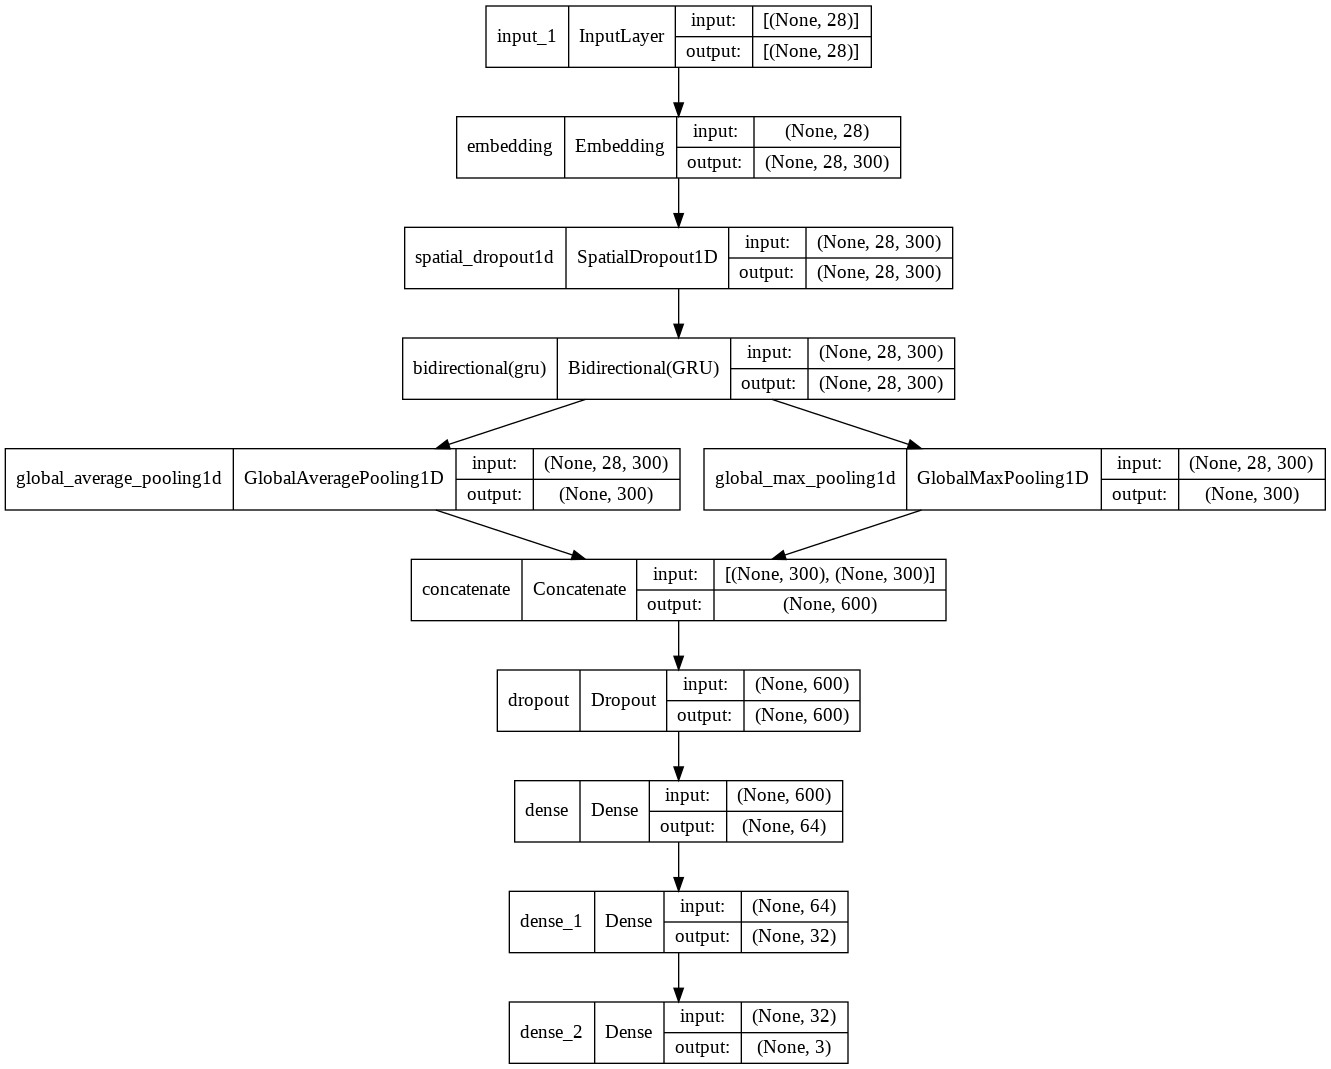

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

In [ ]:
model.fit(X_train_pad, y_train, batch_size=128, epochs=30, verbose=1, class_weight=class_weights,
          validation_split = 0.2, callbacks=[callbacks])

Epoch 1/30
7/7 [==============================] - 10s 238ms/step - loss: 1.0994 - f1: 0.0000e+00 - val_loss: 1.0808 - val_f1: 0.0000e+00
Epoch 2/30
7/7 [==============================] - 0s 45ms/step - loss: 1.0686 - f1: 0.0151 - val_loss: 1.0750 - val_f1: 0.0442
Epoch 3/30
7/7 [==============================] - 0s 43ms/step - loss: 1.0335 - f1: 0.1221 - val_loss: 1.0857 - val_f1: 0.1024
Epoch 4/30
7/7 [==============================] - 0s 44ms/step - loss: 1.0075 - f1: 0.1481 - val_loss: 1.0549 - val_f1: 0.2038
Epoch 5/30
7/7 [==============================] - 0s 42ms/step - loss: 0.9732 - f1: 0.3038 - val_loss: 1.0635 - val_f1: 0.2054
Epoch 6/30
7/7 [==============================] - 0s 42ms/step - loss: 0.9297 - f1: 0.3550 - val_loss: 1.0766 - val_f1: 0.3173
Epoch 7/30
7/7 [==============================] - 0s 42ms/step - loss: 0.8486 - f1: 0.4211 - val_loss: 1.1070 - val_f1: 0.3223
Epoch 8/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6968 - f1: 0.6551 - val_loss

In [ ]:
print(model.evaluate(X_test_pad, y_test))

4/4 [==============================] - 0s 11ms/step - loss: 2.0628 - f1: 0.5569
[2.062809944152832, 0.5569195747375488]


In [ ]:
y_pred = model.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred, target_names=(['Hate','Normal','Abusive'])))


1/1 [==============================] - 1s 953ms/step
              precision    recall  f1-score   support

        Hate       0.53      0.77      0.63        44
      Normal       0.54      0.40      0.46        50
     Abusive       0.78      0.44      0.56        16

   micro avg       0.55      0.55      0.55       110
   macro avg       0.62      0.54      0.55       110
weighted avg       0.57      0.55      0.54       110
 samples avg       0.55      0.55      0.55       110



In [ ]:
f1_score(y_test, y_pred, average="weighted")

0.542292813189365

In [ ]:
from tensorflow import keras
keras.backend.clear_session()

In [ ]:
from sklearn import metrics
metric = metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average='weighted'), metrics.recall_score(y_test, y_pred, average='weighted'), metrics.precision_score(y_test, y_pred, average='weighted')

(0.0, 1.0)

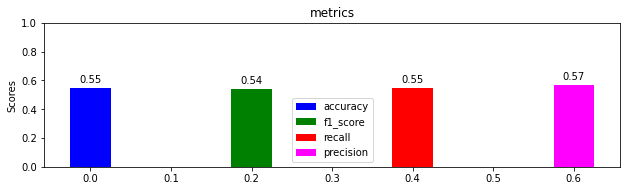

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')
def autolabel(rects):
  """Attach a text label above each bar in *rects*, displaying its height."""
  for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Training on Fasttext Embedding Only

In [ ]:
keras.backend.clear_session()

In [ ]:
inp=Input(shape=(maxlen, ))
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(fasttext_arabic_emb),#Set Fasttext Embedding
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
x=Bidirectional(GRU(150, return_sequences = True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])


x=Dropout(0.1)(conc)
out=Dense(64, activation="relu")(x)
out=Dense(32, activation="relu")(x)

out=Dense(3, activation="softmax")(x)

model_ft=Model(inp,out)

mcp_save = ModelCheckpoint('model_fasttext.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)


In [ ]:
model_ft.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model_ft.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 28, 300)      1353300     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 28, 300)     0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 bidirectional (Bidirectional)  (None, 28, 300)      406800      ['spatial_dropout1d[0][0]']  

In [ ]:
model_ft.fit(X_train_pad, 
             y_train, 
             batch_size=128,
             epochs=20,
             verbose=1,
             class_weight=class_weights,
             validation_split=0.2,
             callbacks=[callbacks])

Epoch 1/20
7/7 [==============================] - 6s 217ms/step - loss: 1.0992 - f1: 0.0000e+00 - val_loss: 1.1020 - val_f1: 0.0000e+00
Epoch 2/20
7/7 [==============================] - 0s 43ms/step - loss: 1.0595 - f1: 0.0132 - val_loss: 1.0894 - val_f1: 0.0227
Epoch 3/20
7/7 [==============================] - 0s 40ms/step - loss: 1.0150 - f1: 0.0668 - val_loss: 1.0701 - val_f1: 0.0579
Epoch 4/20
7/7 [==============================] - 0s 40ms/step - loss: 0.9173 - f1: 0.2202 - val_loss: 1.0606 - val_f1: 0.1873
Epoch 5/20
7/7 [==============================] - 0s 41ms/step - loss: 0.6155 - f1: 0.5886 - val_loss: 1.2453 - val_f1: 0.5539
Epoch 6/20
7/7 [==============================] - 0s 40ms/step - loss: 0.4614 - f1: 0.7784 - val_loss: 1.3206 - val_f1: 0.5289
Epoch 7/20
7/7 [==============================] - 0s 39ms/step - loss: 0.3443 - f1: 0.8278 - val_loss: 1.0627 - val_f1: 0.5218
Epoch 8/20
7/7 [==============================] - 0s 40ms/step - loss: 0.2132 - f1: 0.9048 - val_loss:

In [ ]:
print(model_ft.evaluate(X_test_pad, y_test))

4/4 [==============================] - 0s 10ms/step - loss: 1.4270 - f1: 0.5751
[1.4269672632217407, 0.5751074552536011]


In [ ]:
y_pred_ft = model_ft.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool_ft = np.argmax(y_pred, axis=1)
y_pred_ft = (y_pred_ft > 0.5)

print(classification_report(y_test, y_pred_ft, target_names=(['Hate','Normal','Abusive'])))


1/1 [==============================] - 1s 852ms/step
              precision    recall  f1-score   support

        Hate       0.57      0.64      0.60        44
      Normal       0.60      0.54      0.57        50
     Abusive       0.54      0.44      0.48        16

   micro avg       0.58      0.56      0.57       110
   macro avg       0.57      0.54      0.55       110
weighted avg       0.58      0.56      0.57       110
 samples avg       0.56      0.56      0.56       110



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
metric_ft = metrics.accuracy_score(y_test, y_pred_ft), metrics.f1_score(y_test, y_pred_ft, average='weighted'), metrics.recall_score(y_test, y_pred_ft, average='weighted'), metrics.precision_score(y_test, y_pred_ft, average='weighted')

(0.0, 1.0)

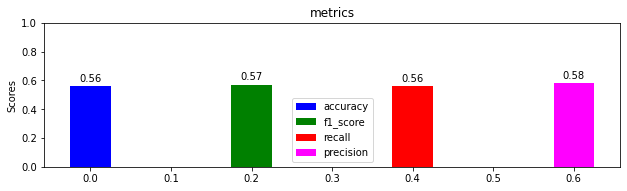

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric_ft[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric_ft[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric_ft[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric_ft[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')


autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Training on Aravec Embedding Only

In [ ]:
keras.backend.clear_session()

In [ ]:
inp=Input(shape=(maxlen, ))
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(aravec_emb),#Set Fasttext Embedding
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
x=Bidirectional(GRU(150, return_sequences = True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])


x=Dropout(0.1)(conc)
out=Dense(64, activation="relu")(x)
out=Dense(32, activation="relu")(x)

out=Dense(3, activation="softmax")(x)

model_arav=Model(inp,out)

mcp_save = ModelCheckpoint('model_aravec.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)


In [ ]:
model_arav.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model_arav.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 28, 300)      1353300     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 28, 300)     0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 bidirectional (Bidirectional)  (None, 28, 300)      406800      ['spatial_dropout1d[0][0]']  

In [ ]:
model_arav.fit(X_train_pad, 
             y_train, 
             batch_size=128,
             epochs=20,
             verbose=1,
             class_weight=class_weights,
             validation_split=0.2,
             callbacks=[callbacks])

Epoch 1/20
7/7 [==============================] - 6s 204ms/step - loss: 1.1407 - f1: 0.0814 - val_loss: 1.1181 - val_f1: 0.0877
Epoch 2/20
7/7 [==============================] - 0s 37ms/step - loss: 1.0202 - f1: 0.2024 - val_loss: 1.0803 - val_f1: 0.2396
Epoch 3/20
7/7 [==============================] - 0s 36ms/step - loss: 0.9955 - f1: 0.2169 - val_loss: 1.1148 - val_f1: 0.1312
Epoch 4/20
7/7 [==============================] - 0s 40ms/step - loss: 0.9800 - f1: 0.2625 - val_loss: 1.0821 - val_f1: 0.3138
Epoch 5/20
7/7 [==============================] - 0s 37ms/step - loss: 0.9415 - f1: 0.3112 - val_loss: 1.0930 - val_f1: 0.2205
Epoch 6/20
7/7 [==============================] - 0s 38ms/step - loss: 0.9143 - f1: 0.3612 - val_loss: 1.0997 - val_f1: 0.2243
Epoch 7/20
7/7 [==============================] - 0s 36ms/step - loss: 0.8713 - f1: 0.3768 - val_loss: 1.1208 - val_f1: 0.2633
Epoch 8/20
7/7 [==============================] - 0s 39ms/step - loss: 0.8308 - f1: 0.4342 - val_loss: 1.0708 

In [ ]:
print(model_arav.evaluate(X_test_pad, y_test))

4/4 [==============================] - 0s 10ms/step - loss: 1.7997 - f1: 0.5589
[1.7996968030929565, 0.558903694152832]


In [ ]:
y_pred_arav = model_arav.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool_ft = np.argmax(y_pred, axis=1)
y_pred_arav = (y_pred_arav > 0.5)

print(classification_report(y_test, y_pred_arav, target_names=(['Hate','Normal','Abusive'])))


1/1 [==============================] - 1s 891ms/step
              precision    recall  f1-score   support

        Hate       0.55      0.59      0.57        44
      Normal       0.61      0.50      0.55        50
     Abusive       0.55      0.69      0.61        16

   micro avg       0.57      0.56      0.57       110
   macro avg       0.57      0.59      0.58       110
weighted avg       0.58      0.56      0.57       110
 samples avg       0.56      0.56      0.56       110



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
metric_arav = metrics.accuracy_score(y_test, y_pred_arav), metrics.f1_score(y_test, y_pred_arav, average='weighted'), metrics.recall_score(y_test, y_pred_arav, average='weighted'), metrics.precision_score(y_test, y_pred_arav, average='weighted')

(0.0, 1.0)

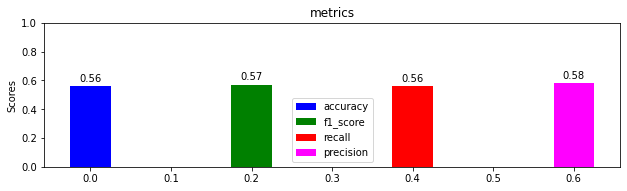

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric_arav[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric_arav[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric_arav[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric_arav[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')


autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Comparing the three results

In [ ]:
Data = [('Fasttext',) + metric_ft  ,
        ('AraVec',)+ metric_arav ,
         ('Fasttext + AraVec',)+ metric ]

In [ ]:
Results = pd.DataFrame(data =  Data , columns=['Embedding','Accuracy','F1_score','Recall','Precision'])

In [ ]:
Results

,Embedding,Accuracy,F1_score,Recall,Precision
0,Fasttext,0.563636,0.569453,0.563636,0.579620
1,AraVec,0.563636,0.567211,0.563636,0.578438
2,Fasttext + AraVec,0.554545,0.542293,0.554545,0.571332
